In [1]:
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.simplefilter("error", Warning)
np.set_printoptions(formatter={"float_kind": lambda x: f"{x:.4f}"})

In [3]:
# class ItemToCall:
#     def __init__(self, func):
#         self._func = func

#     def __getitem__(self, *args):
#         return self._func(*args)

# A_ = ItemToCall(np.array)

In [4]:
s0 = 0
ds0 = 0
dds0 = 0
sf = 1
dsf = 0
ddsf = 0

In [5]:
def sv(s): return [1, s, s**2, s**3, s**4, s**5]
def dsv(s): return [0, 1, 2*s, 3*s**2, 4*s**3, 5*s**4]
def ddsv(s): return [0, 0, 2, 6*s, 12*s**2, 20*s**3]

def pv(C, s): return C @ sv(s)
def dpv(C, s): return C @ dsv(s)
def ddpv(C, s): return C @ ddsv(s)

In [6]:
S = np.array([
    sv(0),
    dsv(0),
    ddsv(0),
    sv(1),
    dsv(1),
    ddsv(1),
])
Y = np.array([s0, ds0, dds0, sf, dsf, ddsf])

In [7]:
S

array([[ 1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1],
       [ 0,  1,  2,  3,  4,  5],
       [ 0,  0,  2,  6, 12, 20]])

In [8]:
C = pinv(S) @ Y
print(C)

[0.0000 -0.0000 -0.0000 10.0000 -15.0000 6.0000]


In [9]:
[
    pv(C, 0),
    dpv(C, 0),
    ddpv(C, 0),
    pv(C, 1),
    dpv(C, 1),
    ddpv(C, 1),
]

[1.5432100042289676e-14,
 -5.9507954119908391e-14,
 -2.8518853945058709e-14,
 0.99999999999999467,
 3.907985046680551e-14,
 0.0]

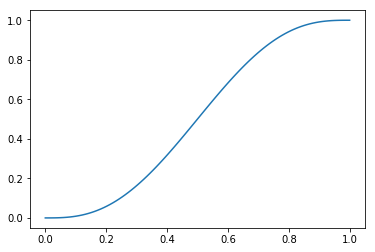

In [10]:
ss = np.linspace(0, 1, 100)
ys = [pv(C, s) for s in ss]
plt.plot(ss, ys)